In [1]:
try:
    import google.colab  # noqa: F401

    %pip install -q daml[tensorflow]
except Exception:
    pass

import os

# from pytest import approx

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from daml.metrics.outlier import AEGMMOutlier, AEOutlier, VAEGMMOutlier, VAEOutlier
from daml.models.tensorflow import AE, AEGMM, VAE, VAEGMM, create_model

tf.random.set_seed(108)
tf.keras.utils.set_random_seed(408)

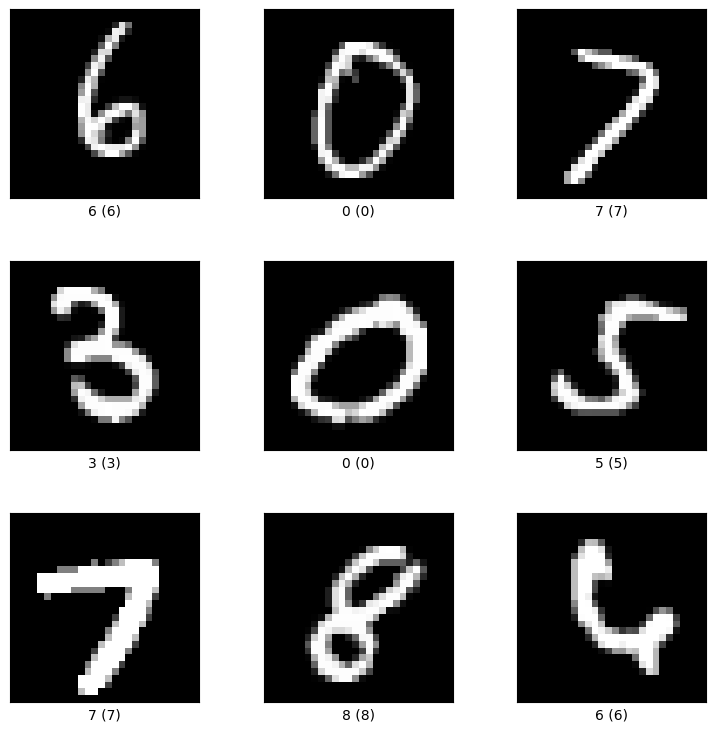

In [3]:
# Load in the mnist dataset from tensorflow datasets
(images, ds_info) = tfds.load(
    "mnist",
    split="train[:2000]",
    with_info=True,
)  # type: ignore

images = images.shuffle(images.cardinality())
tfds.visualization.show_examples(images, ds_info)
images = np.array([i["image"] for i in images], dtype=np.float32) / 255.0
input_shape = images[0].shape

In [4]:
detectors = [
    AEOutlier(create_model(AE, input_shape)),
    AEGMMOutlier(create_model(AEGMM, input_shape)),
    VAEOutlier(create_model(VAE, input_shape)),
    VAEGMMOutlier(create_model(VAEGMM, input_shape)),
]

In [5]:
# Train the detector on the set of images
# metric.fit_dataset(
#    images=images,
#    epochs=20,
#    threshold=Threshold(99, ThresholdType.PERCENTAGE),
#    verbose=False,
# )

for detector in detectors:
    print(f"Training {detector.__class__.__name__}...")
    detector.fit(images, threshold_perc=99, epochs=10)

Training AEOutlier...


 1/32 [.] - ETA: 11s - loss_ma: 0.1137

 2/32 [.] - ETA: 6s - loss_ma: 0.1157 

 3/32 [.] - ETA: 5s - loss_ma: 0.1145

 4/32 [.] - ETA: 5s - loss_ma: 0.1133

 5/32 [.] - ETA: 5s - loss_ma: 0.1117

 6/32 [.] - ETA: 5s - loss_ma: 0.1106

 7/32 [.] - ETA: 5s - loss_ma: 0.1097

 8/32 [.] - ETA: 5s - loss_ma: 0.1090

 9/32 [.] - ETA: 5s - loss_ma: 0.1084

10/32 [.] - ETA: 5s - loss_ma: 0.1080

11/32 [.] - ETA: 5s - loss_ma: 0.1077

12/32 [.] - ETA: 4s - loss_ma: 0.1075

13/32 [.] - ETA: 4s - loss_ma: 0.1072

14/32 [.] - ETA: 4s - loss_ma: 0.1070

15/32 [.] - ETA: 4s - loss_ma: 0.1067

16/32 [.] - ETA: 3s - loss_ma: 0.1065

17/32 [.] - ETA: 3s - loss_ma: 0.1062

18/32 [.] - ETA: 3s - loss_ma: 0.1058

19/32 [.] - ETA: 2s - loss_ma: 0.1054

20/32 [.] - ETA: 2s - loss_ma: 0.1050

21/32 [.] - ETA: 2s - loss_ma: 0.1045

22/32 [.] - ETA: 2s - loss_ma: 0.1041

23/32 [.] - ETA: 2s - loss_ma: 0.1036

24/32 [.] - ETA: 1s - loss_ma: 0.1031

25/32 [.] - ETA: 1s - loss_ma: 0.1027

26/32 [.] - ETA: 1s - loss_ma: 0.1022

27/32 [.] - ETA: 1s - loss_ma: 0.1018

28/32 [.] - ETA: 0s - loss_ma: 0.1013

29/32 [.] - ETA: 0s - loss_ma: 0.1009

30/32 [.] - ETA: 0s - loss_ma: 0.1004

31/32 [.] - ETA: 0s - loss_ma: 0.1000

32/32 [=] - 7s 208ms/step - loss_ma: 0.0996


 1/32 [.] - ETA: 5s - loss_ma: 0.0648

 2/32 [.] - ETA: 5s - loss_ma: 0.0647

 3/32 [.] - ETA: 5s - loss_ma: 0.0651

 4/32 [.] - ETA: 4s - loss_ma: 0.0655

 5/32 [.] - ETA: 4s - loss_ma: 0.0657

 6/32 [.] - ETA: 4s - loss_ma: 0.0657

 7/32 [.] - ETA: 4s - loss_ma: 0.0658

 8/32 [.] - ETA: 4s - loss_ma: 0.0659

 9/32 [.] - ETA: 4s - loss_ma: 0.0661

10/32 [.] - ETA: 3s - loss_ma: 0.0662

11/32 [.] - ETA: 3s - loss_ma: 0.0663

12/32 [.] - ETA: 3s - loss_ma: 0.0664

13/32 [.] - ETA: 3s - loss_ma: 0.0665

14/32 [.] - ETA: 3s - loss_ma: 0.0666

15/32 [.] - ETA: 3s - loss_ma: 0.0666

16/32 [.] - ETA: 2s - loss_ma: 0.0667

17/32 [.] - ETA: 2s - loss_ma: 0.0667

18/32 [.] - ETA: 2s - loss_ma: 0.0667

19/32 [.] - ETA: 2s - loss_ma: 0.0667

20/32 [.] - ETA: 2s - loss_ma: 0.0668

21/32 [.] - ETA: 1s - loss_ma: 0.0668

22/32 [.] - ETA: 1s - loss_ma: 0.0668

23/32 [.] - ETA: 1s - loss_ma: 0.0668

24/32 [.] - ETA: 1s - loss_ma: 0.0668

25/32 [.] - ETA: 1s - loss_ma: 0.0669

26/32 [.] - ETA: 1s - loss_ma: 0.0669

27/32 [.] - ETA: 0s - loss_ma: 0.0669

28/32 [.] - ETA: 0s - loss_ma: 0.0669

29/32 [.] - ETA: 0s - loss_ma: 0.0669

30/32 [.] - ETA: 0s - loss_ma: 0.0669

31/32 [.] - ETA: 0s - loss_ma: 0.0669

32/32 [=] - 6s 184ms/step - loss_ma: 0.0670


 1/32 [.] - ETA: 10s - loss_ma: 0.0627

 2/32 [.] - ETA: 7s - loss_ma: 0.0631 

 3/32 [.] - ETA: 6s - loss_ma: 0.0636

 4/32 [.] - ETA: 5s - loss_ma: 0.0639

 5/32 [.] - ETA: 5s - loss_ma: 0.0642

 6/32 [.] - ETA: 5s - loss_ma: 0.0644

 7/32 [.] - ETA: 4s - loss_ma: 0.0645

 8/32 [.] - ETA: 4s - loss_ma: 0.0646

 9/32 [.] - ETA: 4s - loss_ma: 0.0647

10/32 [.] - ETA: 4s - loss_ma: 0.0647

11/32 [.] - ETA: 4s - loss_ma: 0.0648

12/32 [.] - ETA: 4s - loss_ma: 0.0648

13/32 [.] - ETA: 3s - loss_ma: 0.0648

14/32 [.] - ETA: 3s - loss_ma: 0.0648

15/32 [.] - ETA: 3s - loss_ma: 0.0648

16/32 [.] - ETA: 3s - loss_ma: 0.0648

17/32 [.] - ETA: 3s - loss_ma: 0.0647

18/32 [.] - ETA: 3s - loss_ma: 0.0647

19/32 [.] - ETA: 2s - loss_ma: 0.0646

20/32 [.] - ETA: 2s - loss_ma: 0.0646

21/32 [.] - ETA: 2s - loss_ma: 0.0645

22/32 [.] - ETA: 2s - loss_ma: 0.0645

23/32 [.] - ETA: 1s - loss_ma: 0.0644

24/32 [.] - ETA: 1s - loss_ma: 0.0643

25/32 [.] - ETA: 1s - loss_ma: 0.0643

26/32 [.] - ETA: 1s - loss_ma: 0.0642

27/32 [.] - ETA: 1s - loss_ma: 0.0642

28/32 [.] - ETA: 0s - loss_ma: 0.0641

29/32 [.] - ETA: 0s - loss_ma: 0.0641

30/32 [.] - ETA: 0s - loss_ma: 0.0640

31/32 [.] - ETA: 0s - loss_ma: 0.0640

32/32 [=] - 7s 228ms/step - loss_ma: 0.0639


 1/32 [.] - ETA: 7s - loss_ma: 0.0566

 2/32 [.] - ETA: 6s - loss_ma: 0.0570

 3/32 [.] - ETA: 6s - loss_ma: 0.0573

 4/32 [.] - ETA: 6s - loss_ma: 0.0574

 5/32 [.] - ETA: 6s - loss_ma: 0.0574

 6/32 [.] - ETA: 6s - loss_ma: 0.0573

 7/32 [.] - ETA: 5s - loss_ma: 0.0574

 8/32 [.] - ETA: 5s - loss_ma: 0.0574

 9/32 [.] - ETA: 5s - loss_ma: 0.0575

10/32 [.] - ETA: 5s - loss_ma: 0.0575

11/32 [.] - ETA: 5s - loss_ma: 0.0575

12/32 [.] - ETA: 4s - loss_ma: 0.0576

13/32 [.] - ETA: 4s - loss_ma: 0.0576

14/32 [.] - ETA: 4s - loss_ma: 0.0576

15/32 [.] - ETA: 4s - loss_ma: 0.0576

16/32 [.] - ETA: 3s - loss_ma: 0.0576

17/32 [.] - ETA: 3s - loss_ma: 0.0576

18/32 [.] - ETA: 3s - loss_ma: 0.0576

19/32 [.] - ETA: 3s - loss_ma: 0.0576

20/32 [.] - ETA: 2s - loss_ma: 0.0576

21/32 [.] - ETA: 2s - loss_ma: 0.0577

22/32 [.] - ETA: 2s - loss_ma: 0.0577

23/32 [.] - ETA: 2s - loss_ma: 0.0577

24/32 [.] - ETA: 1s - loss_ma: 0.0576

25/32 [.] - ETA: 1s - loss_ma: 0.0576

26/32 [.] - ETA: 1s - loss_ma: 0.0576

27/32 [.] - ETA: 1s - loss_ma: 0.0576

28/32 [.] - ETA: 0s - loss_ma: 0.0576

29/32 [.] - ETA: 0s - loss_ma: 0.0576

30/32 [.] - ETA: 0s - loss_ma: 0.0576

31/32 [.] - ETA: 0s - loss_ma: 0.0576

32/32 [=] - 8s 240ms/step - loss_ma: 0.0576


 1/32 [.] - ETA: 7s - loss_ma: 0.0568

 2/32 [.] - ETA: 7s - loss_ma: 0.0570

 3/32 [.] - ETA: 7s - loss_ma: 0.0567

 4/32 [.] - ETA: 7s - loss_ma: 0.0564

 5/32 [.] - ETA: 6s - loss_ma: 0.0563

 6/32 [.] - ETA: 6s - loss_ma: 0.0561

 7/32 [.] - ETA: 6s - loss_ma: 0.0560

 8/32 [.] - ETA: 5s - loss_ma: 0.0559

 9/32 [.] - ETA: 5s - loss_ma: 0.0558

10/32 [.] - ETA: 5s - loss_ma: 0.0557

11/32 [.] - ETA: 4s - loss_ma: 0.0556

12/32 [.] - ETA: 4s - loss_ma: 0.0556

13/32 [.] - ETA: 4s - loss_ma: 0.0555

14/32 [.] - ETA: 4s - loss_ma: 0.0555

15/32 [.] - ETA: 3s - loss_ma: 0.0554

16/32 [.] - ETA: 3s - loss_ma: 0.0554

17/32 [.] - ETA: 3s - loss_ma: 0.0553

18/32 [.] - ETA: 3s - loss_ma: 0.0553

19/32 [.] - ETA: 3s - loss_ma: 0.0552

20/32 [.] - ETA: 2s - loss_ma: 0.0552

21/32 [.] - ETA: 2s - loss_ma: 0.0551

22/32 [.] - ETA: 2s - loss_ma: 0.0550

23/32 [.] - ETA: 2s - loss_ma: 0.0550

24/32 [.] - ETA: 1s - loss_ma: 0.0549

25/32 [.] - ETA: 1s - loss_ma: 0.0549

26/32 [.] - ETA: 1s - loss_ma: 0.0548

27/32 [.] - ETA: 1s - loss_ma: 0.0547

28/32 [.] - ETA: 0s - loss_ma: 0.0546

29/32 [.] - ETA: 0s - loss_ma: 0.0546

30/32 [.] - ETA: 0s - loss_ma: 0.0545

31/32 [.] - ETA: 0s - loss_ma: 0.0544

32/32 [=] - 7s 228ms/step - loss_ma: 0.0544


 1/32 [.] - ETA: 6s - loss_ma: 0.0478

 2/32 [.] - ETA: 6s - loss_ma: 0.0466

 3/32 [.] - ETA: 6s - loss_ma: 0.0459

 4/32 [.] - ETA: 5s - loss_ma: 0.0455

 5/32 [.] - ETA: 5s - loss_ma: 0.0452

 6/32 [.] - ETA: 5s - loss_ma: 0.0449

 7/32 [.] - ETA: 5s - loss_ma: 0.0447

 8/32 [.] - ETA: 5s - loss_ma: 0.0446

 9/32 [.] - ETA: 5s - loss_ma: 0.0445

10/32 [.] - ETA: 4s - loss_ma: 0.0445

11/32 [.] - ETA: 4s - loss_ma: 0.0444

12/32 [.] - ETA: 4s - loss_ma: 0.0443

13/32 [.] - ETA: 4s - loss_ma: 0.0442

14/32 [.] - ETA: 4s - loss_ma: 0.0441

15/32 [.] - ETA: 4s - loss_ma: 0.0440

16/32 [.] - ETA: 3s - loss_ma: 0.0439

17/32 [.] - ETA: 3s - loss_ma: 0.0438

18/32 [.] - ETA: 3s - loss_ma: 0.0437

19/32 [.] - ETA: 3s - loss_ma: 0.0436

20/32 [.] - ETA: 2s - loss_ma: 0.0435

21/32 [.] - ETA: 2s - loss_ma: 0.0434

22/32 [.] - ETA: 2s - loss_ma: 0.0434

23/32 [.] - ETA: 2s - loss_ma: 0.0433

24/32 [.] - ETA: 1s - loss_ma: 0.0432

25/32 [.] - ETA: 1s - loss_ma: 0.0431

26/32 [.] - ETA: 1s - loss_ma: 0.0430

27/32 [.] - ETA: 1s - loss_ma: 0.0430

28/32 [.] - ETA: 0s - loss_ma: 0.0429

29/32 [.] - ETA: 0s - loss_ma: 0.0428

30/32 [.] - ETA: 0s - loss_ma: 0.0427

31/32 [.] - ETA: 0s - loss_ma: 0.0427

32/32 [=] - 8s 240ms/step - loss_ma: 0.0426


 1/32 [.] - ETA: 7s - loss_ma: 0.0377

 2/32 [.] - ETA: 7s - loss_ma: 0.0373

 3/32 [.] - ETA: 6s - loss_ma: 0.0371

 4/32 [.] - ETA: 6s - loss_ma: 0.0369

 5/32 [.] - ETA: 6s - loss_ma: 0.0367

 6/32 [.] - ETA: 5s - loss_ma: 0.0366

 7/32 [.] - ETA: 5s - loss_ma: 0.0365

 8/32 [.] - ETA: 5s - loss_ma: 0.0363

 9/32 [.] - ETA: 5s - loss_ma: 0.0362

10/32 [.] - ETA: 5s - loss_ma: 0.0361

11/32 [.] - ETA: 4s - loss_ma: 0.0360

12/32 [.] - ETA: 4s - loss_ma: 0.0359

13/32 [.] - ETA: 4s - loss_ma: 0.0358

14/32 [.] - ETA: 4s - loss_ma: 0.0357

15/32 [.] - ETA: 4s - loss_ma: 0.0356

16/32 [.] - ETA: 3s - loss_ma: 0.0356

17/32 [.] - ETA: 3s - loss_ma: 0.0355

18/32 [.] - ETA: 3s - loss_ma: 0.0355

19/32 [.] - ETA: 2s - loss_ma: 0.0354

20/32 [.] - ETA: 2s - loss_ma: 0.0353

21/32 [.] - ETA: 2s - loss_ma: 0.0353

22/32 [.] - ETA: 2s - loss_ma: 0.0352

23/32 [.] - ETA: 2s - loss_ma: 0.0352

24/32 [.] - ETA: 1s - loss_ma: 0.0351

25/32 [.] - ETA: 1s - loss_ma: 0.0351

26/32 [.] - ETA: 1s - loss_ma: 0.0351

27/32 [.] - ETA: 1s - loss_ma: 0.0350

28/32 [.] - ETA: 0s - loss_ma: 0.0350

29/32 [.] - ETA: 0s - loss_ma: 0.0349

30/32 [.] - ETA: 0s - loss_ma: 0.0349

31/32 [.] - ETA: 0s - loss_ma: 0.0348

32/32 [=] - 7s 230ms/step - loss_ma: 0.0348


 1/32 [.] - ETA: 7s - loss_ma: 0.0300

 2/32 [.] - ETA: 6s - loss_ma: 0.0294

 3/32 [.] - ETA: 6s - loss_ma: 0.0293

 4/32 [.] - ETA: 6s - loss_ma: 0.0294

 5/32 [.] - ETA: 5s - loss_ma: 0.0296

 6/32 [.] - ETA: 5s - loss_ma: 0.0297

 7/32 [.] - ETA: 5s - loss_ma: 0.0298

 8/32 [.] - ETA: 5s - loss_ma: 0.0299

 9/32 [.] - ETA: 5s - loss_ma: 0.0299

10/32 [.] - ETA: 4s - loss_ma: 0.0299

11/32 [.] - ETA: 4s - loss_ma: 0.0299

12/32 [.] - ETA: 4s - loss_ma: 0.0299

13/32 [.] - ETA: 4s - loss_ma: 0.0299

14/32 [.] - ETA: 4s - loss_ma: 0.0299

15/32 [.] - ETA: 3s - loss_ma: 0.0299

16/32 [.] - ETA: 3s - loss_ma: 0.0299

17/32 [.] - ETA: 3s - loss_ma: 0.0299

18/32 [.] - ETA: 3s - loss_ma: 0.0299

19/32 [.] - ETA: 2s - loss_ma: 0.0299

20/32 [.] - ETA: 2s - loss_ma: 0.0299

21/32 [.] - ETA: 2s - loss_ma: 0.0298

22/32 [.] - ETA: 2s - loss_ma: 0.0298

23/32 [.] - ETA: 2s - loss_ma: 0.0298

24/32 [.] - ETA: 1s - loss_ma: 0.0298

25/32 [.] - ETA: 1s - loss_ma: 0.0298

26/32 [.] - ETA: 1s - loss_ma: 0.0298

27/32 [.] - ETA: 1s - loss_ma: 0.0298

28/32 [.] - ETA: 0s - loss_ma: 0.0297

29/32 [.] - ETA: 0s - loss_ma: 0.0297

30/32 [.] - ETA: 0s - loss_ma: 0.0297

31/32 [.] - ETA: 0s - loss_ma: 0.0297

32/32 [=] - 7s 224ms/step - loss_ma: 0.0297


 1/32 [.] - ETA: 7s - loss_ma: 0.0294

 2/32 [.] - ETA: 6s - loss_ma: 0.0282

 3/32 [.] - ETA: 6s - loss_ma: 0.0277

 4/32 [.] - ETA: 6s - loss_ma: 0.0274

 5/32 [.] - ETA: 5s - loss_ma: 0.0273

 6/32 [.] - ETA: 5s - loss_ma: 0.0273

 7/32 [.] - ETA: 5s - loss_ma: 0.0272

 8/32 [.] - ETA: 5s - loss_ma: 0.0272

 9/32 [.] - ETA: 5s - loss_ma: 0.0271

10/32 [.] - ETA: 5s - loss_ma: 0.0271

11/32 [.] - ETA: 4s - loss_ma: 0.0270

12/32 [.] - ETA: 4s - loss_ma: 0.0270

13/32 [.] - ETA: 4s - loss_ma: 0.0269

14/32 [.] - ETA: 4s - loss_ma: 0.0269

15/32 [.] - ETA: 4s - loss_ma: 0.0269

16/32 [.] - ETA: 3s - loss_ma: 0.0268

17/32 [.] - ETA: 3s - loss_ma: 0.0268

18/32 [.] - ETA: 3s - loss_ma: 0.0268

19/32 [.] - ETA: 3s - loss_ma: 0.0267

20/32 [.] - ETA: 2s - loss_ma: 0.0267

21/32 [.] - ETA: 2s - loss_ma: 0.0266

22/32 [.] - ETA: 2s - loss_ma: 0.0266

23/32 [.] - ETA: 2s - loss_ma: 0.0266

24/32 [.] - ETA: 1s - loss_ma: 0.0265

25/32 [.] - ETA: 1s - loss_ma: 0.0265

26/32 [.] - ETA: 1s - loss_ma: 0.0265

27/32 [.] - ETA: 1s - loss_ma: 0.0265

28/32 [.] - ETA: 0s - loss_ma: 0.0264

29/32 [.] - ETA: 0s - loss_ma: 0.0264

30/32 [.] - ETA: 0s - loss_ma: 0.0264

31/32 [.] - ETA: 0s - loss_ma: 0.0264

32/32 [=] - 7s 230ms/step - loss_ma: 0.0263


 1/32 [.] - ETA: 6s - loss_ma: 0.0210

 2/32 [.] - ETA: 6s - loss_ma: 0.0217

 3/32 [.] - ETA: 6s - loss_ma: 0.0221

 4/32 [.] - ETA: 6s - loss_ma: 0.0223

 5/32 [.] - ETA: 6s - loss_ma: 0.0224

 6/32 [.] - ETA: 6s - loss_ma: 0.0225

 7/32 [.] - ETA: 6s - loss_ma: 0.0225

 8/32 [.] - ETA: 5s - loss_ma: 0.0225

 9/32 [.] - ETA: 5s - loss_ma: 0.0226

10/32 [.] - ETA: 5s - loss_ma: 0.0226

11/32 [.] - ETA: 4s - loss_ma: 0.0226

12/32 [.] - ETA: 4s - loss_ma: 0.0227

13/32 [.] - ETA: 4s - loss_ma: 0.0227

14/32 [.] - ETA: 3s - loss_ma: 0.0227

15/32 [.] - ETA: 3s - loss_ma: 0.0227

16/32 [.] - ETA: 3s - loss_ma: 0.0227

17/32 [.] - ETA: 3s - loss_ma: 0.0227

18/32 [.] - ETA: 3s - loss_ma: 0.0227

19/32 [.] - ETA: 2s - loss_ma: 0.0227

20/32 [.] - ETA: 2s - loss_ma: 0.0227

21/32 [.] - ETA: 2s - loss_ma: 0.0227

22/32 [.] - ETA: 2s - loss_ma: 0.0227

23/32 [.] - ETA: 1s - loss_ma: 0.0227

24/32 [.] - ETA: 1s - loss_ma: 0.0227

25/32 [.] - ETA: 1s - loss_ma: 0.0227

26/32 [.] - ETA: 1s - loss_ma: 0.0227

27/32 [.] - ETA: 1s - loss_ma: 0.0227

28/32 [.] - ETA: 0s - loss_ma: 0.0227

29/32 [.] - ETA: 0s - loss_ma: 0.0227

30/32 [.] - ETA: 0s - loss_ma: 0.0227

31/32 [.] - ETA: 0s - loss_ma: 0.0227

32/32 [=] - 7s 223ms/step - loss_ma: 0.0227


Training AEGMMOutlier...


 1/32 [.] - ETA: 10s - loss_ma: 9.8298

 2/32 [.] - ETA: 2s - loss_ma: 8.2716 

 3/32 [.] - ETA: 2s - loss_ma: 7.1579

 4/32 [.] - ETA: 2s - loss_ma: 6.3569

 5/32 [.] - ETA: 2s - loss_ma: 5.7531

 6/32 [.] - ETA: 2s - loss_ma: 5.2856

 7/32 [.] - ETA: 2s - loss_ma: 4.9096

 8/32 [.] - ETA: 2s - loss_ma: 4.6008

 9/32 [.] - ETA: 2s - loss_ma: 4.3471

10/32 [.] - ETA: 2s - loss_ma: 4.1309

11/32 [.] - ETA: 1s - loss_ma: 3.9506

12/32 [.] - ETA: 1s - loss_ma: 3.7907

13/32 [.] - ETA: 1s - loss_ma: 3.6477

14/32 [.] - ETA: 1s - loss_ma: 3.5191

15/32 [.] - ETA: 1s - loss_ma: 3.4029

16/32 [.] - ETA: 1s - loss_ma: 3.2973

17/32 [.] - ETA: 1s - loss_ma: 3.2008

18/32 [.] - ETA: 1s - loss_ma: 3.1122

19/32 [.] - ETA: 1s - loss_ma: 3.0307

20/32 [.] - ETA: 1s - loss_ma: 2.9552

21/32 [.] - ETA: 1s - loss_ma: 2.8852

22/32 [.] - ETA: 0s - loss_ma: 2.8200

23/32 [.] - ETA: 0s - loss_ma: 2.7591

24/32 [.] - ETA: 0s - loss_ma: 2.7022

25/32 [.] - ETA: 0s - loss_ma: 2.6485

26/32 [.] - ETA: 0s - loss_ma: 2.5980

27/32 [.] - ETA: 0s - loss_ma: 2.5503

28/32 [.] - ETA: 0s - loss_ma: 2.5053

29/32 [.] - ETA: 0s - loss_ma: 2.4627

30/32 [.] - ETA: 0s - loss_ma: 2.4224

31/32 [.] - ETA: 0s - loss_ma: 2.3841

32/32 [=] - 3s 91ms/step - loss_ma: 2.3475


 1/32 [.] - ETA: 3s - loss_ma: 0.8015

 2/32 [.] - ETA: 3s - loss_ma: 0.7906

 3/32 [.] - ETA: 3s - loss_ma: 0.7701

 4/32 [.] - ETA: 3s - loss_ma: 0.7582

 5/32 [.] - ETA: 3s - loss_ma: 0.7535

 6/32 [.] - ETA: 3s - loss_ma: 0.7460

 7/32 [.] - ETA: 2s - loss_ma: 0.7374

 8/32 [.] - ETA: 2s - loss_ma: 0.7310

 9/32 [.] - ETA: 2s - loss_ma: 0.7271

10/32 [.] - ETA: 2s - loss_ma: 0.7244

11/32 [.] - ETA: 2s - loss_ma: 0.7219

12/32 [.] - ETA: 2s - loss_ma: 0.7206

13/32 [.] - ETA: 2s - loss_ma: 0.7188

14/32 [.] - ETA: 2s - loss_ma: 0.7176

15/32 [.] - ETA: 1s - loss_ma: 0.7166

16/32 [.] - ETA: 1s - loss_ma: 0.7155

17/32 [.] - ETA: 1s - loss_ma: 0.7146

18/32 [.] - ETA: 1s - loss_ma: 0.7135

19/32 [.] - ETA: 1s - loss_ma: 0.7125

20/32 [.] - ETA: 1s - loss_ma: 0.7113

21/32 [.] - ETA: 1s - loss_ma: 0.7105

22/32 [.] - ETA: 1s - loss_ma: 0.7096

23/32 [.] - ETA: 1s - loss_ma: 0.7087

24/32 [.] - ETA: 0s - loss_ma: 0.7077

25/32 [.] - ETA: 0s - loss_ma: 0.7070

26/32 [.] - ETA: 0s - loss_ma: 0.7061

27/32 [.] - ETA: 0s - loss_ma: 0.7052

28/32 [.] - ETA: 0s - loss_ma: 0.7045

29/32 [.] - ETA: 0s - loss_ma: 0.7038

30/32 [.] - ETA: 0s - loss_ma: 0.7033

31/32 [.] - ETA: 0s - loss_ma: 0.7026

32/32 [=] - 4s 115ms/step - loss_ma: 0.7017


 1/32 [.] - ETA: 3s - loss_ma: 0.5699

 2/32 [.] - ETA: 4s - loss_ma: 0.5657

 3/32 [.] - ETA: 3s - loss_ma: 0.5720

 4/32 [.] - ETA: 3s - loss_ma: 0.5868

 5/32 [.] - ETA: 3s - loss_ma: 0.6000

 6/32 [.] - ETA: 2s - loss_ma: 0.6100

 7/32 [.] - ETA: 2s - loss_ma: 0.6185

 8/32 [.] - ETA: 2s - loss_ma: 0.6249

 9/32 [.] - ETA: 2s - loss_ma: 0.6312

10/32 [.] - ETA: 2s - loss_ma: 0.6365

11/32 [.] - ETA: 2s - loss_ma: 0.6417

12/32 [.] - ETA: 2s - loss_ma: 0.6466

13/32 [.] - ETA: 2s - loss_ma: 0.6513

14/32 [.] - ETA: 1s - loss_ma: 0.6544

15/32 [.] - ETA: 1s - loss_ma: 0.6573

16/32 [.] - ETA: 1s - loss_ma: 0.6600

17/32 [.] - ETA: 1s - loss_ma: 0.6620

18/32 [.] - ETA: 1s - loss_ma: 0.6635

19/32 [.] - ETA: 1s - loss_ma: 0.6648

20/32 [.] - ETA: 1s - loss_ma: 0.6660

21/32 [.] - ETA: 1s - loss_ma: 0.6667

22/32 [.] - ETA: 1s - loss_ma: 0.6674

23/32 [.] - ETA: 0s - loss_ma: 0.6683

24/32 [.] - ETA: 0s - loss_ma: 0.6693

25/32 [.] - ETA: 0s - loss_ma: 0.6703

26/32 [.] - ETA: 0s - loss_ma: 0.6713

27/32 [.] - ETA: 0s - loss_ma: 0.6723

28/32 [.] - ETA: 0s - loss_ma: 0.6732

29/32 [.] - ETA: 0s - loss_ma: 0.6740

30/32 [.] - ETA: 0s - loss_ma: 0.6752

31/32 [.] - ETA: 0s - loss_ma: 0.6762

32/32 [=] - 3s 107ms/step - loss_ma: 0.6769


 1/32 [.] - ETA: 2s - loss_ma: 0.7403

 2/32 [.] - ETA: 2s - loss_ma: 0.7122

 3/32 [.] - ETA: 2s - loss_ma: 0.7152

 4/32 [.] - ETA: 2s - loss_ma: 0.7181

 5/32 [.] - ETA: 2s - loss_ma: 0.7162

 6/32 [.] - ETA: 2s - loss_ma: 0.7072

 7/32 [.] - ETA: 2s - loss_ma: 0.6997

 8/32 [.] - ETA: 2s - loss_ma: 0.6942

 9/32 [.] - ETA: 2s - loss_ma: 0.6911

10/32 [.] - ETA: 2s - loss_ma: 0.6891

11/32 [.] - ETA: 2s - loss_ma: 0.6880

12/32 [.] - ETA: 1s - loss_ma: 0.6854

13/32 [.] - ETA: 1s - loss_ma: 0.6831

14/32 [.] - ETA: 1s - loss_ma: 0.6803

15/32 [.] - ETA: 1s - loss_ma: 0.6782

16/32 [.] - ETA: 1s - loss_ma: 0.6762

17/32 [.] - ETA: 1s - loss_ma: 0.6740

18/32 [.] - ETA: 1s - loss_ma: 0.6721

19/32 [.] - ETA: 1s - loss_ma: 0.6702

20/32 [.] - ETA: 1s - loss_ma: 0.6684

21/32 [.] - ETA: 1s - loss_ma: 0.6667

22/32 [.] - ETA: 1s - loss_ma: 0.6655

23/32 [.] - ETA: 0s - loss_ma: 0.6645

24/32 [.] - ETA: 0s - loss_ma: 0.6637

25/32 [.] - ETA: 0s - loss_ma: 0.6630

26/32 [.] - ETA: 0s - loss_ma: 0.6623

27/32 [.] - ETA: 0s - loss_ma: 0.6618

28/32 [.] - ETA: 0s - loss_ma: 0.6615

29/32 [.] - ETA: 0s - loss_ma: 0.6612

30/32 [.] - ETA: 0s - loss_ma: 0.6610

31/32 [.] - ETA: 0s - loss_ma: 0.6609

32/32 [=] - 3s 102ms/step - loss_ma: 0.6606


 1/32 [.] - ETA: 3s - loss_ma: 0.6017

 2/32 [.] - ETA: 2s - loss_ma: 0.5888

 3/32 [.] - ETA: 2s - loss_ma: 0.6097

 4/32 [.] - ETA: 2s - loss_ma: 0.6125

 5/32 [.] - ETA: 2s - loss_ma: 0.6119

 6/32 [.] - ETA: 1s - loss_ma: 0.6109

 7/32 [.] - ETA: 1s - loss_ma: 0.6094

 8/32 [.] - ETA: 1s - loss_ma: 0.6082

 9/32 [.] - ETA: 1s - loss_ma: 0.6081

10/32 [.] - ETA: 1s - loss_ma: 0.6096

11/32 [.] - ETA: 1s - loss_ma: 0.6109

12/32 [.] - ETA: 1s - loss_ma: 0.6133

13/32 [.] - ETA: 1s - loss_ma: 0.6146

14/32 [.] - ETA: 1s - loss_ma: 0.6154

16/32 [.] - ETA: 1s - loss_ma: 0.6166

18/32 [.] - ETA: 0s - loss_ma: 0.6166

20/32 [.] - ETA: 0s - loss_ma: 0.6166

21/32 [.] - ETA: 0s - loss_ma: 0.6171

23/32 [.] - ETA: 0s - loss_ma: 0.6187

25/32 [.] - ETA: 0s - loss_ma: 0.6209

26/32 [.] - ETA: 0s - loss_ma: 0.6219

28/32 [.] - ETA: 0s - loss_ma: 0.6240

29/32 [.] - ETA: 0s - loss_ma: 0.6251

31/32 [.] - ETA: 0s - loss_ma: 0.6267

32/32 [=] - 2s 57ms/step - loss_ma: 0.6273


 1/32 [.] - ETA: 1s - loss_ma: 0.4426

 3/32 [.] - ETA: 1s - loss_ma: 0.5484

 5/32 [.] - ETA: 1s - loss_ma: 0.5649

 7/32 [.] - ETA: 1s - loss_ma: 0.5673

 8/32 [.] - ETA: 1s - loss_ma: 0.5690

 9/32 [.] - ETA: 1s - loss_ma: 0.5705

10/32 [.] - ETA: 1s - loss_ma: 0.5712

11/32 [.] - ETA: 1s - loss_ma: 0.5714

13/32 [.] - ETA: 0s - loss_ma: 0.5714

14/32 [.] - ETA: 0s - loss_ma: 0.5709

16/32 [.] - ETA: 0s - loss_ma: 0.5685

18/32 [.] - ETA: 0s - loss_ma: 0.5666

20/32 [.] - ETA: 0s - loss_ma: 0.5664

21/32 [.] - ETA: 0s - loss_ma: 0.5665

23/32 [.] - ETA: 0s - loss_ma: 0.5668

24/32 [.] - ETA: 0s - loss_ma: 0.5673

26/32 [.] - ETA: 0s - loss_ma: 0.5682

28/32 [.] - ETA: 0s - loss_ma: 0.5692

30/32 [.] - ETA: 0s - loss_ma: 0.5700

32/32 [=] - 2s 49ms/step - loss_ma: 0.5738


 1/32 [.] - ETA: 1s - loss_ma: 0.7592

 3/32 [.] - ETA: 1s - loss_ma: 0.6806

 4/32 [.] - ETA: 1s - loss_ma: 0.6582

 5/32 [.] - ETA: 1s - loss_ma: 0.6393

 6/32 [.] - ETA: 1s - loss_ma: 0.6328

 7/32 [.] - ETA: 1s - loss_ma: 0.6322

 8/32 [.] - ETA: 1s - loss_ma: 0.6306

10/32 [.] - ETA: 1s - loss_ma: 0.6329

12/32 [.] - ETA: 1s - loss_ma: 0.6322

14/32 [.] - ETA: 0s - loss_ma: 0.6434

15/32 [.] - ETA: 0s - loss_ma: 0.6561

16/32 [.] - ETA: 0s - loss_ma: 0.6726

18/32 [.] - ETA: 0s - loss_ma: 0.7009

20/32 [.] - ETA: 0s - loss_ma: 0.7274

22/32 [.] - ETA: 0s - loss_ma: 0.7494

23/32 [.] - ETA: 0s - loss_ma: 0.7598

25/32 [.] - ETA: 0s - loss_ma: 0.7789

27/32 [.] - ETA: 0s - loss_ma: 0.7958

29/32 [.] - ETA: 0s - loss_ma: 0.8095

31/32 [.] - ETA: 0s - loss_ma: 0.8201

32/32 [=] - 2s 50ms/step - loss_ma: 0.8246


 1/32 [.] - ETA: 1s - loss_ma: 1.0016

 3/32 [.] - ETA: 1s - loss_ma: 0.7971

 5/32 [.] - ETA: 1s - loss_ma: 0.7336

 7/32 [.] - ETA: 1s - loss_ma: 0.6975

 8/32 [.] - ETA: 1s - loss_ma: 0.6842

 9/32 [.] - ETA: 1s - loss_ma: 0.6747

10/32 [.] - ETA: 1s - loss_ma: 0.6649

11/32 [.] - ETA: 1s - loss_ma: 0.6561

12/32 [.] - ETA: 1s - loss_ma: 0.6489

14/32 [.] - ETA: 0s - loss_ma: 0.6373

16/32 [.] - ETA: 0s - loss_ma: 0.6300

18/32 [.] - ETA: 0s - loss_ma: 0.6260

19/32 [.] - ETA: 0s - loss_ma: 0.6238

20/32 [.] - ETA: 0s - loss_ma: 0.6217

21/32 [.] - ETA: 0s - loss_ma: 0.6198

22/32 [.] - ETA: 0s - loss_ma: 0.6181

23/32 [.] - ETA: 0s - loss_ma: 0.6166

24/32 [.] - ETA: 0s - loss_ma: 0.6151

25/32 [.] - ETA: 0s - loss_ma: 0.6135

26/32 [.] - ETA: 0s - loss_ma: 0.6121

27/32 [.] - ETA: 0s - loss_ma: 0.6110

28/32 [.] - ETA: 0s - loss_ma: 0.6102

29/32 [.] - ETA: 0s - loss_ma: 0.6091

30/32 [.] - ETA: 0s - loss_ma: 0.6084

31/32 [.] - ETA: 0s - loss_ma: 0.6081

32/32 [=] - 2s 55ms/step - loss_ma: 0.6081


 1/32 [.] - ETA: 1s - loss_ma: 0.7464

 2/32 [.] - ETA: 1s - loss_ma: 0.7333

 4/32 [.] - ETA: 1s - loss_ma: 0.7390

 6/32 [.] - ETA: 1s - loss_ma: 0.7192

 8/32 [.] - ETA: 1s - loss_ma: 0.7015

10/32 [.] - ETA: 1s - loss_ma: 0.6840

12/32 [.] - ETA: 0s - loss_ma: 0.6709

13/32 [.] - ETA: 0s - loss_ma: 0.6654

14/32 [.] - ETA: 0s - loss_ma: 0.6620

15/32 [.] - ETA: 0s - loss_ma: 0.6590

16/32 [.] - ETA: 0s - loss_ma: 0.6565

17/32 [.] - ETA: 0s - loss_ma: 0.6547

18/32 [.] - ETA: 0s - loss_ma: 0.6532

19/32 [.] - ETA: 0s - loss_ma: 0.6522

20/32 [.] - ETA: 0s - loss_ma: 0.6513

21/32 [.] - ETA: 0s - loss_ma: 0.6504

22/32 [.] - ETA: 0s - loss_ma: 0.6494

24/32 [.] - ETA: 0s - loss_ma: 0.6477

25/32 [.] - ETA: 0s - loss_ma: 0.6467

27/32 [.] - ETA: 0s - loss_ma: 0.6449

29/32 [.] - ETA: 0s - loss_ma: 0.6427

31/32 [.] - ETA: 0s - loss_ma: 0.6407

32/32 [=] - 2s 51ms/step - loss_ma: 0.6402


 1/32 [.] - ETA: 1s - loss_ma: 0.4525

 3/32 [.] - ETA: 1s - loss_ma: 0.4863

 4/32 [.] - ETA: 1s - loss_ma: 0.4845

 5/32 [.] - ETA: 1s - loss_ma: 0.4853

 6/32 [.] - ETA: 1s - loss_ma: 0.4894

 7/32 [.] - ETA: 1s - loss_ma: 0.4938

 9/32 [.] - ETA: 1s - loss_ma: 0.5011

10/32 [.] - ETA: 1s - loss_ma: 0.5045

11/32 [.] - ETA: 1s - loss_ma: 0.5079

13/32 [.] - ETA: 0s - loss_ma: 0.5140

15/32 [.] - ETA: 0s - loss_ma: 0.5177

17/32 [.] - ETA: 0s - loss_ma: 0.5211

19/32 [.] - ETA: 0s - loss_ma: 0.5240

21/32 [.] - ETA: 0s - loss_ma: 0.5267

23/32 [.] - ETA: 0s - loss_ma: 0.5290

25/32 [.] - ETA: 0s - loss_ma: 0.5305

27/32 [.] - ETA: 0s - loss_ma: 0.5314

28/32 [.] - ETA: 0s - loss_ma: 0.5317

29/32 [.] - ETA: 0s - loss_ma: 0.5318

30/32 [.] - ETA: 0s - loss_ma: 0.5320

31/32 [.] - ETA: 0s - loss_ma: 0.5321

32/32 [=] - 2s 49ms/step - loss_ma: 0.5322


Training VAEOutlier...


 1/32 [.] - ETA: 9s - loss_ma: 17185.5879

 2/32 [.] - ETA: 6s - loss_ma: 17700.0308

 3/32 [.] - ETA: 6s - loss_ma: 17023.2640

 4/32 [.] - ETA: 6s - loss_ma: 16384.1378

 5/32 [.] - ETA: 5s - loss_ma: 15825.8450

 6/32 [.] - ETA: 5s - loss_ma: 16601.2595

 7/32 [.] - ETA: 5s - loss_ma: 16953.8147

 8/32 [.] - ETA: 5s - loss_ma: 17131.6327

 9/32 [.] - ETA: 5s - loss_ma: 17231.4431

10/32 [.] - ETA: 4s - loss_ma: 17282.2308

11/32 [.] - ETA: 4s - loss_ma: 17301.9821

12/32 [.] - ETA: 4s - loss_ma: 17301.1382

13/32 [.] - ETA: 4s - loss_ma: 17292.2150

14/32 [.] - ETA: 4s - loss_ma: 17277.2184

15/32 [.] - ETA: 3s - loss_ma: 17254.6471

16/32 [.] - ETA: 3s - loss_ma: 17232.8178

17/32 [.] - ETA: 3s - loss_ma: 17210.2485

18/32 [.] - ETA: 3s - loss_ma: 17188.5174

19/32 [.] - ETA: 3s - loss_ma: 17168.2867

20/32 [.] - ETA: 2s - loss_ma: 17145.1527

21/32 [.] - ETA: 2s - loss_ma: 17119.2596

22/32 [.] - ETA: 2s - loss_ma: 17094.6175

23/32 [.] - ETA: 2s - loss_ma: 17068.8231

24/32 [.] - ETA: 1s - loss_ma: 17042.1324

25/32 [.] - ETA: 1s - loss_ma: 17014.8009

26/32 [.] - ETA: 1s - loss_ma: 16987.4169

27/32 [.] - ETA: 1s - loss_ma: 16961.8924

28/32 [.] - ETA: 1s - loss_ma: 16937.1955

29/32 [.] - ETA: 0s - loss_ma: 16912.9151

30/32 [.] - ETA: 0s - loss_ma: 16888.1091

31/32 [.] - ETA: 0s - loss_ma: 16864.4937

32/32 [=] - 8s 256ms/step - loss_ma: 16840.0148


 1/32 [.] - ETA: 6s - loss_ma: 16251.4697

 2/32 [.] - ETA: 7s - loss_ma: 16108.9192

 3/32 [.] - ETA: 6s - loss_ma: 15893.2901

 4/32 [.] - ETA: 6s - loss_ma: 15746.2267

 5/32 [.] - ETA: 5s - loss_ma: 15698.5254

 6/32 [.] - ETA: 5s - loss_ma: 15654.7626

 7/32 [.] - ETA: 5s - loss_ma: 15596.8348

 8/32 [.] - ETA: 5s - loss_ma: 15552.3261

 9/32 [.] - ETA: 5s - loss_ma: 15504.5195

10/32 [.] - ETA: 5s - loss_ma: 15461.9077

11/32 [.] - ETA: 5s - loss_ma: 15441.0075

12/32 [.] - ETA: 4s - loss_ma: 15429.0533

13/32 [.] - ETA: 4s - loss_ma: 15418.3927

14/32 [.] - ETA: 4s - loss_ma: 15404.4227

15/32 [.] - ETA: 4s - loss_ma: 15383.8346

16/32 [.] - ETA: 3s - loss_ma: 15363.7345

17/32 [.] - ETA: 3s - loss_ma: 15342.8001

18/32 [.] - ETA: 3s - loss_ma: 15323.3481

19/32 [.] - ETA: 3s - loss_ma: 15299.9735

20/32 [.] - ETA: 2s - loss_ma: 15279.1308

21/32 [.] - ETA: 2s - loss_ma: 15258.6462

22/32 [.] - ETA: 2s - loss_ma: 15237.4387

23/32 [.] - ETA: 2s - loss_ma: 15215.2741

24/32 [.] - ETA: 1s - loss_ma: 15194.6789

25/32 [.] - ETA: 1s - loss_ma: 15174.8645

26/32 [.] - ETA: 1s - loss_ma: 15154.2551

27/32 [.] - ETA: 1s - loss_ma: 15134.3854

28/32 [.] - ETA: 0s - loss_ma: 15113.5176

29/32 [.] - ETA: 0s - loss_ma: 15090.6795

30/32 [.] - ETA: 0s - loss_ma: 15065.9946

31/32 [.] - ETA: 0s - loss_ma: 15041.0231

32/32 [=] - 7s 232ms/step - loss_ma: 15013.9633


 1/32 [.] - ETA: 6s - loss_ma: 10633.8516

 2/32 [.] - ETA: 6s - loss_ma: 10538.9841

 3/32 [.] - ETA: 6s - loss_ma: 10408.0173

 4/32 [.] - ETA: 5s - loss_ma: 10297.1486

 5/32 [.] - ETA: 5s - loss_ma: 10196.7129

 6/32 [.] - ETA: 5s - loss_ma: 10099.5524

 7/32 [.] - ETA: 5s - loss_ma: 10023.9061

 8/32 [.] - ETA: 4s - loss_ma: 9961.6313 

 9/32 [.] - ETA: 4s - loss_ma: 9910.3376

10/32 [.] - ETA: 4s - loss_ma: 9862.1433

11/32 [.] - ETA: 4s - loss_ma: 9824.9341

12/32 [.] - ETA: 4s - loss_ma: 9796.6138

13/32 [.] - ETA: 4s - loss_ma: 9771.9703

14/32 [.] - ETA: 4s - loss_ma: 9750.1405

15/32 [.] - ETA: 3s - loss_ma: 9729.0911

16/32 [.] - ETA: 3s - loss_ma: 9710.4143

17/32 [.] - ETA: 3s - loss_ma: 9689.6275

18/32 [.] - ETA: 3s - loss_ma: 9669.8779

19/32 [.] - ETA: 2s - loss_ma: 9649.7534

20/32 [.] - ETA: 2s - loss_ma: 9629.5783

21/32 [.] - ETA: 2s - loss_ma: 9609.6727

22/32 [.] - ETA: 2s - loss_ma: 9590.9476

23/32 [.] - ETA: 2s - loss_ma: 9573.1743

24/32 [.] - ETA: 1s - loss_ma: 9555.7634

25/32 [.] - ETA: 1s - loss_ma: 9538.7315

26/32 [.] - ETA: 1s - loss_ma: 9522.5002

27/32 [.] - ETA: 1s - loss_ma: 9507.0406

28/32 [.] - ETA: 0s - loss_ma: 9491.6347

29/32 [.] - ETA: 0s - loss_ma: 9476.7096

30/32 [.] - ETA: 0s - loss_ma: 9462.7720

31/32 [.] - ETA: 0s - loss_ma: 9448.1712

32/32 [=] - 7s 220ms/step - loss_ma: 9433.8789


 1/32 [.] - ETA: 6s - loss_ma: 8705.6475

 2/32 [.] - ETA: 6s - loss_ma: 8567.7881

 3/32 [.] - ETA: 6s - loss_ma: 8603.6966

 4/32 [.] - ETA: 6s - loss_ma: 8578.6508

 5/32 [.] - ETA: 6s - loss_ma: 8570.6211

 6/32 [.] - ETA: 6s - loss_ma: 8557.2580

 7/32 [.] - ETA: 5s - loss_ma: 8538.1224

 8/32 [.] - ETA: 5s - loss_ma: 8516.8329

 9/32 [.] - ETA: 5s - loss_ma: 8503.5249

10/32 [.] - ETA: 4s - loss_ma: 8492.7779

11/32 [.] - ETA: 4s - loss_ma: 8488.7511

12/32 [.] - ETA: 4s - loss_ma: 8488.3966

13/32 [.] - ETA: 4s - loss_ma: 8489.8311

14/32 [.] - ETA: 3s - loss_ma: 8488.9611

15/32 [.] - ETA: 3s - loss_ma: 8489.6791

16/32 [.] - ETA: 3s - loss_ma: 8489.9846

17/32 [.] - ETA: 3s - loss_ma: 8489.0842

18/32 [.] - ETA: 3s - loss_ma: 8488.4517

19/32 [.] - ETA: 2s - loss_ma: 8488.6175

20/32 [.] - ETA: 2s - loss_ma: 8487.7170

21/32 [.] - ETA: 2s - loss_ma: 8487.7448

22/32 [.] - ETA: 2s - loss_ma: 8487.2705

23/32 [.] - ETA: 2s - loss_ma: 8487.2309

24/32 [.] - ETA: 1s - loss_ma: 8487.2559

25/32 [.] - ETA: 1s - loss_ma: 8487.4067

26/32 [.] - ETA: 1s - loss_ma: 8487.4361

27/32 [.] - ETA: 1s - loss_ma: 8487.3748

28/32 [.] - ETA: 0s - loss_ma: 8487.6919

29/32 [.] - ETA: 0s - loss_ma: 8487.2753

30/32 [.] - ETA: 0s - loss_ma: 8487.1911

31/32 [.] - ETA: 0s - loss_ma: 8486.7019

32/32 [=] - 7s 219ms/step - loss_ma: 8485.9518


 1/32 [.] - ETA: 6s - loss_ma: 8550.5195

 2/32 [.] - ETA: 6s - loss_ma: 8470.4165

 3/32 [.] - ETA: 6s - loss_ma: 8462.5987

 4/32 [.] - ETA: 6s - loss_ma: 8438.1017

 5/32 [.] - ETA: 5s - loss_ma: 8427.0382

 6/32 [.] - ETA: 5s - loss_ma: 8431.9938

 7/32 [.] - ETA: 5s - loss_ma: 8438.8653

 8/32 [.] - ETA: 5s - loss_ma: 8451.6613

 9/32 [.] - ETA: 4s - loss_ma: 8463.1161

10/32 [.] - ETA: 4s - loss_ma: 8470.3921

11/32 [.] - ETA: 4s - loss_ma: 8476.7591

12/32 [.] - ETA: 4s - loss_ma: 8480.9081

13/32 [.] - ETA: 4s - loss_ma: 8481.6680

14/32 [.] - ETA: 3s - loss_ma: 8482.8090

15/32 [.] - ETA: 3s - loss_ma: 8482.2961

16/32 [.] - ETA: 3s - loss_ma: 8480.8354

17/32 [.] - ETA: 3s - loss_ma: 8478.5187

18/32 [.] - ETA: 2s - loss_ma: 8475.1416

19/32 [.] - ETA: 2s - loss_ma: 8472.1209

20/32 [.] - ETA: 2s - loss_ma: 8468.9541

21/32 [.] - ETA: 2s - loss_ma: 8466.2944

22/32 [.] - ETA: 2s - loss_ma: 8463.0570

23/32 [.] - ETA: 1s - loss_ma: 8460.3459

24/32 [.] - ETA: 1s - loss_ma: 8458.3895

25/32 [.] - ETA: 1s - loss_ma: 8456.2397

26/32 [.] - ETA: 1s - loss_ma: 8454.4490

27/32 [.] - ETA: 1s - loss_ma: 8452.9377

28/32 [.] - ETA: 0s - loss_ma: 8451.2531

29/32 [.] - ETA: 0s - loss_ma: 8449.8929

30/32 [.] - ETA: 0s - loss_ma: 8448.3747

31/32 [.] - ETA: 0s - loss_ma: 8446.3060

32/32 [=] - 7s 209ms/step - loss_ma: 8445.0508


 1/32 [.] - ETA: 6s - loss_ma: 8050.5322

 2/32 [.] - ETA: 6s - loss_ma: 8132.1953

 3/32 [.] - ETA: 6s - loss_ma: 8172.1127

 4/32 [.] - ETA: 6s - loss_ma: 8205.4787

 5/32 [.] - ETA: 6s - loss_ma: 8214.0877

 6/32 [.] - ETA: 6s - loss_ma: 8219.0618

 7/32 [.] - ETA: 5s - loss_ma: 8211.4496

 8/32 [.] - ETA: 5s - loss_ma: 8210.1037

 9/32 [.] - ETA: 5s - loss_ma: 8204.1074

10/32 [.] - ETA: 5s - loss_ma: 8195.1034

11/32 [.] - ETA: 4s - loss_ma: 8192.0721

12/32 [.] - ETA: 4s - loss_ma: 8189.7613

13/32 [.] - ETA: 4s - loss_ma: 8184.2889

14/32 [.] - ETA: 4s - loss_ma: 8178.2102

15/32 [.] - ETA: 4s - loss_ma: 8169.9271

16/32 [.] - ETA: 3s - loss_ma: 8161.1330

17/32 [.] - ETA: 3s - loss_ma: 8152.1925

18/32 [.] - ETA: 3s - loss_ma: 8145.1550

19/32 [.] - ETA: 3s - loss_ma: 8139.2847

20/32 [.] - ETA: 2s - loss_ma: 8134.2529

21/32 [.] - ETA: 2s - loss_ma: 8130.2210

22/32 [.] - ETA: 2s - loss_ma: 8127.7562

23/32 [.] - ETA: 2s - loss_ma: 8124.8571

24/32 [.] - ETA: 1s - loss_ma: 8121.2011

25/32 [.] - ETA: 1s - loss_ma: 8117.6194

26/32 [.] - ETA: 1s - loss_ma: 8113.4547

27/32 [.] - ETA: 1s - loss_ma: 8108.6800

28/32 [.] - ETA: 0s - loss_ma: 8102.9773

29/32 [.] - ETA: 0s - loss_ma: 8097.2551

30/32 [.] - ETA: 0s - loss_ma: 8091.7127

31/32 [.] - ETA: 0s - loss_ma: 8086.2654

32/32 [=] - 7s 227ms/step - loss_ma: 8081.3295


 1/32 [.] - ETA: 6s - loss_ma: 7362.6055

 2/32 [.] - ETA: 6s - loss_ma: 7489.0216

 3/32 [.] - ETA: 7s - loss_ma: 7520.5423

 4/32 [.] - ETA: 6s - loss_ma: 7550.2395

 5/32 [.] - ETA: 6s - loss_ma: 7558.3452

 6/32 [.] - ETA: 5s - loss_ma: 7563.8818

 7/32 [.] - ETA: 5s - loss_ma: 7569.7850

 8/32 [.] - ETA: 5s - loss_ma: 7571.9395

 9/32 [.] - ETA: 5s - loss_ma: 7578.0339

10/32 [.] - ETA: 4s - loss_ma: 7583.3838

11/32 [.] - ETA: 4s - loss_ma: 7587.6521

12/32 [.] - ETA: 4s - loss_ma: 7591.9828

13/32 [.] - ETA: 4s - loss_ma: 7596.0736

14/32 [.] - ETA: 4s - loss_ma: 7597.2574

15/32 [.] - ETA: 3s - loss_ma: 7598.0630

16/32 [.] - ETA: 3s - loss_ma: 7597.9229

17/32 [.] - ETA: 3s - loss_ma: 7599.3961

18/32 [.] - ETA: 3s - loss_ma: 7600.1670

19/32 [.] - ETA: 2s - loss_ma: 7598.8933

20/32 [.] - ETA: 2s - loss_ma: 7597.4633

21/32 [.] - ETA: 2s - loss_ma: 7596.9328

22/32 [.] - ETA: 2s - loss_ma: 7596.4912

23/32 [.] - ETA: 2s - loss_ma: 7596.3323

24/32 [.] - ETA: 1s - loss_ma: 7595.5853

25/32 [.] - ETA: 1s - loss_ma: 7595.0569

26/32 [.] - ETA: 1s - loss_ma: 7593.8318

27/32 [.] - ETA: 1s - loss_ma: 7592.1158

28/32 [.] - ETA: 0s - loss_ma: 7590.2228

29/32 [.] - ETA: 0s - loss_ma: 7587.9404

30/32 [.] - ETA: 0s - loss_ma: 7586.2605

31/32 [.] - ETA: 0s - loss_ma: 7585.2466

32/32 [=] - 7s 221ms/step - loss_ma: 7582.3156


 1/32 [.] - ETA: 6s - loss_ma: 7527.3442

 2/32 [.] - ETA: 6s - loss_ma: 7494.9061

 3/32 [.] - ETA: 6s - loss_ma: 7510.2623

 4/32 [.] - ETA: 5s - loss_ma: 7533.8984

 5/32 [.] - ETA: 5s - loss_ma: 7546.0518

 6/32 [.] - ETA: 5s - loss_ma: 7542.2090

 7/32 [.] - ETA: 5s - loss_ma: 7535.2916

 8/32 [.] - ETA: 5s - loss_ma: 7529.2102

 9/32 [.] - ETA: 4s - loss_ma: 7519.5805

10/32 [.] - ETA: 4s - loss_ma: 7509.5895

11/32 [.] - ETA: 4s - loss_ma: 7503.3008

12/32 [.] - ETA: 4s - loss_ma: 7492.4288

13/32 [.] - ETA: 4s - loss_ma: 7484.4736

14/32 [.] - ETA: 3s - loss_ma: 7478.4575

15/32 [.] - ETA: 3s - loss_ma: 7472.4147

16/32 [.] - ETA: 3s - loss_ma: 7466.5846

17/32 [.] - ETA: 3s - loss_ma: 7460.4100

18/32 [.] - ETA: 2s - loss_ma: 7455.5494

19/32 [.] - ETA: 2s - loss_ma: 7451.2829

20/32 [.] - ETA: 2s - loss_ma: 7446.2791

21/32 [.] - ETA: 2s - loss_ma: 7440.9645

22/32 [.] - ETA: 2s - loss_ma: 7435.0602

23/32 [.] - ETA: 1s - loss_ma: 7429.6801

24/32 [.] - ETA: 1s - loss_ma: 7425.4837

25/32 [.] - ETA: 1s - loss_ma: 7422.6161

26/32 [.] - ETA: 1s - loss_ma: 7420.0365

27/32 [.] - ETA: 1s - loss_ma: 7417.7928

28/32 [.] - ETA: 0s - loss_ma: 7415.5781

29/32 [.] - ETA: 0s - loss_ma: 7413.2758

30/32 [.] - ETA: 0s - loss_ma: 7410.6280

31/32 [.] - ETA: 0s - loss_ma: 7408.2856

32/32 [=] - 7s 209ms/step - loss_ma: 7406.2407


 1/32 [.] - ETA: 6s - loss_ma: 7522.6147

 2/32 [.] - ETA: 6s - loss_ma: 7483.1129

 3/32 [.] - ETA: 5s - loss_ma: 7460.3620

 4/32 [.] - ETA: 5s - loss_ma: 7492.4838

 5/32 [.] - ETA: 5s - loss_ma: 7498.7605

 6/32 [.] - ETA: 5s - loss_ma: 7491.3094

 7/32 [.] - ETA: 5s - loss_ma: 7479.7100

 8/32 [.] - ETA: 5s - loss_ma: 7459.0393

 9/32 [.] - ETA: 5s - loss_ma: 7446.3831

10/32 [.] - ETA: 4s - loss_ma: 7441.3611

11/32 [.] - ETA: 4s - loss_ma: 7434.0060

12/32 [.] - ETA: 4s - loss_ma: 7425.1550

13/32 [.] - ETA: 4s - loss_ma: 7415.0913

14/32 [.] - ETA: 3s - loss_ma: 7404.3157

15/32 [.] - ETA: 3s - loss_ma: 7392.7224

16/32 [.] - ETA: 3s - loss_ma: 7382.1120

17/32 [.] - ETA: 3s - loss_ma: 7371.9435

18/32 [.] - ETA: 3s - loss_ma: 7363.3134

19/32 [.] - ETA: 2s - loss_ma: 7357.0318

20/32 [.] - ETA: 2s - loss_ma: 7349.6415

21/32 [.] - ETA: 2s - loss_ma: 7342.3743

22/32 [.] - ETA: 2s - loss_ma: 7335.7858

23/32 [.] - ETA: 1s - loss_ma: 7329.7759

24/32 [.] - ETA: 1s - loss_ma: 7323.8148

25/32 [.] - ETA: 1s - loss_ma: 7318.3542

26/32 [.] - ETA: 1s - loss_ma: 7313.5775

27/32 [.] - ETA: 1s - loss_ma: 7309.5379

28/32 [.] - ETA: 0s - loss_ma: 7306.0315

29/32 [.] - ETA: 0s - loss_ma: 7302.1945

30/32 [.] - ETA: 0s - loss_ma: 7298.3913

31/32 [.] - ETA: 0s - loss_ma: 7294.6556

32/32 [=] - 7s 216ms/step - loss_ma: 7290.8502


 1/32 [.] - ETA: 7s - loss_ma: 7164.0215

 2/32 [.] - ETA: 6s - loss_ma: 7148.1909

 3/32 [.] - ETA: 6s - loss_ma: 7118.8781

 4/32 [.] - ETA: 6s - loss_ma: 7098.1107

 5/32 [.] - ETA: 5s - loss_ma: 7099.2387

 6/32 [.] - ETA: 5s - loss_ma: 7106.9326

 7/32 [.] - ETA: 5s - loss_ma: 7113.1352

 8/32 [.] - ETA: 5s - loss_ma: 7110.8505

 9/32 [.] - ETA: 5s - loss_ma: 7108.1595

10/32 [.] - ETA: 5s - loss_ma: 7100.4809

11/32 [.] - ETA: 4s - loss_ma: 7095.2458

12/32 [.] - ETA: 4s - loss_ma: 7087.2332

13/32 [.] - ETA: 4s - loss_ma: 7078.2383

14/32 [.] - ETA: 4s - loss_ma: 7067.4067

15/32 [.] - ETA: 3s - loss_ma: 7057.9684

16/32 [.] - ETA: 3s - loss_ma: 7049.6839

17/32 [.] - ETA: 3s - loss_ma: 7040.4071

18/32 [.] - ETA: 3s - loss_ma: 7031.1398

19/32 [.] - ETA: 3s - loss_ma: 7021.0634

20/32 [.] - ETA: 2s - loss_ma: 7012.1589

21/32 [.] - ETA: 2s - loss_ma: 7002.8029

22/32 [.] - ETA: 2s - loss_ma: 6995.7054

23/32 [.] - ETA: 2s - loss_ma: 6988.0349

24/32 [.] - ETA: 1s - loss_ma: 6979.4646

25/32 [.] - ETA: 1s - loss_ma: 6971.1477

26/32 [.] - ETA: 1s - loss_ma: 6963.2399

27/32 [.] - ETA: 1s - loss_ma: 6955.8268

28/32 [.] - ETA: 0s - loss_ma: 6948.8626

29/32 [.] - ETA: 0s - loss_ma: 6942.0672

30/32 [.] - ETA: 0s - loss_ma: 6936.3042

31/32 [.] - ETA: 0s - loss_ma: 6931.2784

32/32 [=] - 7s 227ms/step - loss_ma: 6925.9227


Training VAEGMMOutlier...
 1/32 [.] - ETA: 5s - loss_ma: 25.8483

 2/32 [.] - ETA: 2s - loss_ma: 21.4625

 3/32 [.] - ETA: 2s - loss_ma: 18.7056

 4/32 [.] - ETA: 2s - loss_ma: 16.7828

 5/32 [.] - ETA: 2s - loss_ma: 15.3005

 6/32 [.] - ETA: 2s - loss_ma: 14.1580

 7/32 [.] - ETA: 1s - loss_ma: 13.2221

 8/32 [.] - ETA: 1s - loss_ma: 12.4263

 9/32 [.] - ETA: 1s - loss_ma: 11.7407

10/32 [.] - ETA: 1s - loss_ma: 11.1487

11/32 [.] - ETA: 1s - loss_ma: 10.6299

12/32 [.] - ETA: 1s - loss_ma: 10.1683

13/32 [.] - ETA: 1s - loss_ma: 9.7543 

14/32 [.] - ETA: 1s - loss_ma: 9.3823

15/32 [.] - ETA: 1s - loss_ma: 9.0442

16/32 [.] - ETA: 1s - loss_ma: 8.7361

17/32 [.] - ETA: 1s - loss_ma: 8.4537

18/32 [.] - ETA: 1s - loss_ma: 8.1942

19/32 [.] - ETA: 1s - loss_ma: 7.9545

20/32 [.] - ETA: 1s - loss_ma: 7.7324

21/32 [.] - ETA: 0s - loss_ma: 7.5259

22/32 [.] - ETA: 0s - loss_ma: 7.3330

23/32 [.] - ETA: 0s - loss_ma: 7.1526

24/32 [.] - ETA: 0s - loss_ma: 6.9837

25/32 [.] - ETA: 0s - loss_ma: 6.8254

26/32 [.] - ETA: 0s - loss_ma: 6.6762

27/32 [.] - ETA: 0s - loss_ma: 6.5355

28/32 [.] - ETA: 0s - loss_ma: 6.4029

29/32 [.] - ETA: 0s - loss_ma: 6.2772

30/32 [.] - ETA: 0s - loss_ma: 6.1580

31/32 [.] - ETA: 0s - loss_ma: 6.0449

32/32 [=] - 3s 81ms/step - loss_ma: 5.9375


 1/32 [.] - ETA: 2s - loss_ma: 0.9329

 2/32 [.] - ETA: 2s - loss_ma: 0.9477

 3/32 [.] - ETA: 2s - loss_ma: 0.9682

 4/32 [.] - ETA: 2s - loss_ma: 0.9689

 5/32 [.] - ETA: 2s - loss_ma: 0.9675

 6/32 [.] - ETA: 2s - loss_ma: 0.9643

 7/32 [.] - ETA: 2s - loss_ma: 0.9596

 8/32 [.] - ETA: 1s - loss_ma: 0.9573

 9/32 [.] - ETA: 1s - loss_ma: 0.9544

10/32 [.] - ETA: 1s - loss_ma: 0.9530

11/32 [.] - ETA: 1s - loss_ma: 0.9516

12/32 [.] - ETA: 1s - loss_ma: 0.9498

13/32 [.] - ETA: 1s - loss_ma: 0.9482

14/32 [.] - ETA: 1s - loss_ma: 0.9466

15/32 [.] - ETA: 1s - loss_ma: 0.9450

16/32 [.] - ETA: 1s - loss_ma: 0.9436

17/32 [.] - ETA: 1s - loss_ma: 0.9423

18/32 [.] - ETA: 1s - loss_ma: 0.9410

19/32 [.] - ETA: 1s - loss_ma: 0.9400

20/32 [.] - ETA: 0s - loss_ma: 0.9389

21/32 [.] - ETA: 0s - loss_ma: 0.9379

22/32 [.] - ETA: 0s - loss_ma: 0.9367

23/32 [.] - ETA: 0s - loss_ma: 0.9353

24/32 [.] - ETA: 0s - loss_ma: 0.9339

25/32 [.] - ETA: 0s - loss_ma: 0.9327

26/32 [.] - ETA: 0s - loss_ma: 0.9315

27/32 [.] - ETA: 0s - loss_ma: 0.9303

28/32 [.] - ETA: 0s - loss_ma: 0.9290

29/32 [.] - ETA: 0s - loss_ma: 0.9276

30/32 [.] - ETA: 0s - loss_ma: 0.9263

31/32 [.] - ETA: 0s - loss_ma: 0.9250

32/32 [=] - 3s 80ms/step - loss_ma: 0.9236


 1/32 [.] - ETA: 3s - loss_ma: 0.7898

 2/32 [.] - ETA: 2s - loss_ma: 0.7680

 3/32 [.] - ETA: 3s - loss_ma: 0.7625

 4/32 [.] - ETA: 3s - loss_ma: 0.7618

 5/32 [.] - ETA: 2s - loss_ma: 0.7609

 6/32 [.] - ETA: 2s - loss_ma: 0.7617

 7/32 [.] - ETA: 2s - loss_ma: 0.7627

 8/32 [.] - ETA: 2s - loss_ma: 0.7625

 9/32 [.] - ETA: 2s - loss_ma: 0.7613

10/32 [.] - ETA: 2s - loss_ma: 0.7608

11/32 [.] - ETA: 2s - loss_ma: 0.7603

12/32 [.] - ETA: 2s - loss_ma: 0.7597

13/32 [.] - ETA: 1s - loss_ma: 0.7592

14/32 [.] - ETA: 1s - loss_ma: 0.7589

15/32 [.] - ETA: 1s - loss_ma: 0.7585

16/32 [.] - ETA: 1s - loss_ma: 0.7580

17/32 [.] - ETA: 1s - loss_ma: 0.7575

18/32 [.] - ETA: 1s - loss_ma: 0.7568

19/32 [.] - ETA: 1s - loss_ma: 0.7562

20/32 [.] - ETA: 1s - loss_ma: 0.7554

21/32 [.] - ETA: 1s - loss_ma: 0.7546

22/32 [.] - ETA: 0s - loss_ma: 0.7537

23/32 [.] - ETA: 0s - loss_ma: 0.7529

24/32 [.] - ETA: 0s - loss_ma: 0.7520

25/32 [.] - ETA: 0s - loss_ma: 0.7512

26/32 [.] - ETA: 0s - loss_ma: 0.7503

27/32 [.] - ETA: 0s - loss_ma: 0.7493

28/32 [.] - ETA: 0s - loss_ma: 0.7484

29/32 [.] - ETA: 0s - loss_ma: 0.7476

30/32 [.] - ETA: 0s - loss_ma: 0.7466

31/32 [.] - ETA: 0s - loss_ma: 0.7457

32/32 [=] - 3s 89ms/step - loss_ma: 0.7449


 1/32 [.] - ETA: 2s - loss_ma: 0.6492

 2/32 [.] - ETA: 2s - loss_ma: 0.6479

 3/32 [.] - ETA: 2s - loss_ma: 0.6545

 4/32 [.] - ETA: 2s - loss_ma: 0.6585

 5/32 [.] - ETA: 2s - loss_ma: 0.6621

 6/32 [.] - ETA: 1s - loss_ma: 0.6654

 7/32 [.] - ETA: 2s - loss_ma: 0.6672

 8/32 [.] - ETA: 2s - loss_ma: 0.6691

 9/32 [.] - ETA: 2s - loss_ma: 0.6692

10/32 [.] - ETA: 2s - loss_ma: 0.6689

11/32 [.] - ETA: 1s - loss_ma: 0.6683

12/32 [.] - ETA: 1s - loss_ma: 0.6677

13/32 [.] - ETA: 1s - loss_ma: 0.6667

14/32 [.] - ETA: 1s - loss_ma: 0.6658

15/32 [.] - ETA: 1s - loss_ma: 0.6651

16/32 [.] - ETA: 1s - loss_ma: 0.6643

17/32 [.] - ETA: 1s - loss_ma: 0.6636

18/32 [.] - ETA: 1s - loss_ma: 0.6628

19/32 [.] - ETA: 1s - loss_ma: 0.6620

20/32 [.] - ETA: 0s - loss_ma: 0.6611

21/32 [.] - ETA: 0s - loss_ma: 0.6602

22/32 [.] - ETA: 0s - loss_ma: 0.6594

23/32 [.] - ETA: 0s - loss_ma: 0.6585

24/32 [.] - ETA: 0s - loss_ma: 0.6576

25/32 [.] - ETA: 0s - loss_ma: 0.6567

26/32 [.] - ETA: 0s - loss_ma: 0.6559

27/32 [.] - ETA: 0s - loss_ma: 0.6552

28/32 [.] - ETA: 0s - loss_ma: 0.6545

29/32 [.] - ETA: 0s - loss_ma: 0.6538

30/32 [.] - ETA: 0s - loss_ma: 0.6531

31/32 [.] - ETA: 0s - loss_ma: 0.6524

32/32 [=] - 3s 80ms/step - loss_ma: 0.6518


 1/32 [.] - ETA: 2s - loss_ma: 0.6123

 2/32 [.] - ETA: 2s - loss_ma: 0.6180

 3/32 [.] - ETA: 2s - loss_ma: 0.6208

 4/32 [.] - ETA: 1s - loss_ma: 0.6178

 5/32 [.] - ETA: 1s - loss_ma: 0.6153

 6/32 [.] - ETA: 1s - loss_ma: 0.6148

 7/32 [.] - ETA: 1s - loss_ma: 0.6145

 8/32 [.] - ETA: 1s - loss_ma: 0.6140

 9/32 [.] - ETA: 1s - loss_ma: 0.6128

10/32 [.] - ETA: 1s - loss_ma: 0.6121

11/32 [.] - ETA: 1s - loss_ma: 0.6115

12/32 [.] - ETA: 1s - loss_ma: 0.6109

13/32 [.] - ETA: 1s - loss_ma: 0.6105

14/32 [.] - ETA: 1s - loss_ma: 0.6103

15/32 [.] - ETA: 1s - loss_ma: 0.6100

16/32 [.] - ETA: 1s - loss_ma: 0.6101

17/32 [.] - ETA: 1s - loss_ma: 0.6099

18/32 [.] - ETA: 1s - loss_ma: 0.6097

19/32 [.] - ETA: 1s - loss_ma: 0.6094

20/32 [.] - ETA: 0s - loss_ma: 0.6092

21/32 [.] - ETA: 0s - loss_ma: 0.6089

22/32 [.] - ETA: 0s - loss_ma: 0.6087

23/32 [.] - ETA: 0s - loss_ma: 0.6084

24/32 [.] - ETA: 0s - loss_ma: 0.6082

25/32 [.] - ETA: 0s - loss_ma: 0.6080

26/32 [.] - ETA: 0s - loss_ma: 0.6077

27/32 [.] - ETA: 0s - loss_ma: 0.6075

28/32 [.] - ETA: 0s - loss_ma: 0.6071

29/32 [.] - ETA: 0s - loss_ma: 0.6068

30/32 [.] - ETA: 0s - loss_ma: 0.6064

31/32 [.] - ETA: 0s - loss_ma: 0.6061

32/32 [=] - 3s 79ms/step - loss_ma: 0.6059


 1/32 [.] - ETA: 2s - loss_ma: 0.5791

 2/32 [.] - ETA: 2s - loss_ma: 0.5761

 3/32 [.] - ETA: 2s - loss_ma: 0.5716

 4/32 [.] - ETA: 1s - loss_ma: 0.5721

 5/32 [.] - ETA: 1s - loss_ma: 0.5749

 6/32 [.] - ETA: 1s - loss_ma: 0.5757

 7/32 [.] - ETA: 1s - loss_ma: 0.5773

 8/32 [.] - ETA: 1s - loss_ma: 0.5793

 9/32 [.] - ETA: 1s - loss_ma: 0.5820

10/32 [.] - ETA: 1s - loss_ma: 0.5843

11/32 [.] - ETA: 1s - loss_ma: 0.5865

12/32 [.] - ETA: 1s - loss_ma: 0.5890

13/32 [.] - ETA: 1s - loss_ma: 0.5911

14/32 [.] - ETA: 1s - loss_ma: 0.5930

15/32 [.] - ETA: 1s - loss_ma: 0.5948

16/32 [.] - ETA: 1s - loss_ma: 0.5965

17/32 [.] - ETA: 1s - loss_ma: 0.5978

18/32 [.] - ETA: 1s - loss_ma: 0.5989

19/32 [.] - ETA: 0s - loss_ma: 0.5998

20/32 [.] - ETA: 0s - loss_ma: 0.6006

21/32 [.] - ETA: 0s - loss_ma: 0.6015

22/32 [.] - ETA: 0s - loss_ma: 0.6024

23/32 [.] - ETA: 0s - loss_ma: 0.6032

24/32 [.] - ETA: 0s - loss_ma: 0.6038

25/32 [.] - ETA: 0s - loss_ma: 0.6044

26/32 [.] - ETA: 0s - loss_ma: 0.6049

27/32 [.] - ETA: 0s - loss_ma: 0.6054

28/32 [.] - ETA: 0s - loss_ma: 0.6058

29/32 [.] - ETA: 0s - loss_ma: 0.6062

30/32 [.] - ETA: 0s - loss_ma: 0.6066

31/32 [.] - ETA: 0s - loss_ma: 0.6070

32/32 [=] - 3s 79ms/step - loss_ma: 1.4680


 1/32 [.] - ETA: 2s - loss_ma: 0.6473

 2/32 [.] - ETA: 2s - loss_ma: 0.6515

 3/32 [.] - ETA: 2s - loss_ma: 0.6584

 4/32 [.] - ETA: 2s - loss_ma: 0.6692

 5/32 [.] - ETA: 2s - loss_ma: 0.6789

 6/32 [.] - ETA: 2s - loss_ma: 0.6879

 7/32 [.] - ETA: 2s - loss_ma: 0.6956

 8/32 [.] - ETA: 1s - loss_ma: 0.7023

 9/32 [.] - ETA: 1s - loss_ma: 0.7086

10/32 [.] - ETA: 1s - loss_ma: 0.7144

11/32 [.] - ETA: 1s - loss_ma: 0.7201

12/32 [.] - ETA: 1s - loss_ma: 0.7256

13/32 [.] - ETA: 1s - loss_ma: 0.7309

14/32 [.] - ETA: 1s - loss_ma: 0.7355

15/32 [.] - ETA: 1s - loss_ma: 0.7400

16/32 [.] - ETA: 1s - loss_ma: 0.7444

17/32 [.] - ETA: 1s - loss_ma: 0.7486

18/32 [.] - ETA: 1s - loss_ma: 0.7528

19/32 [.] - ETA: 1s - loss_ma: 0.7568

20/32 [.] - ETA: 0s - loss_ma: 0.7605

21/32 [.] - ETA: 0s - loss_ma: 0.7640

22/32 [.] - ETA: 0s - loss_ma: 0.7674

23/32 [.] - ETA: 0s - loss_ma: 0.7707

24/32 [.] - ETA: 0s - loss_ma: 0.7738

25/32 [.] - ETA: 0s - loss_ma: 0.7769

26/32 [.] - ETA: 0s - loss_ma: 0.7798

27/32 [.] - ETA: 0s - loss_ma: 0.7826

28/32 [.] - ETA: 0s - loss_ma: 0.7854

29/32 [.] - ETA: 0s - loss_ma: 0.7880

30/32 [.] - ETA: 0s - loss_ma: 0.7906

31/32 [.] - ETA: 0s - loss_ma: 0.7930

32/32 [=] - 3s 79ms/step - loss_ma: 0.7954


 1/32 [.] - ETA: 2s - loss_ma: 0.9611

 2/32 [.] - ETA: 2s - loss_ma: 0.9489

 3/32 [.] - ETA: 2s - loss_ma: 0.9457

 4/32 [.] - ETA: 1s - loss_ma: 0.9465

 5/32 [.] - ETA: 2s - loss_ma: 0.9479

 6/32 [.] - ETA: 2s - loss_ma: 0.9500

 7/32 [.] - ETA: 1s - loss_ma: 0.9511

 8/32 [.] - ETA: 1s - loss_ma: 0.9515

 9/32 [.] - ETA: 1s - loss_ma: 0.9511

10/32 [.] - ETA: 1s - loss_ma: 0.9506

11/32 [.] - ETA: 1s - loss_ma: 0.9493

12/32 [.] - ETA: 1s - loss_ma: 0.9479

13/32 [.] - ETA: 1s - loss_ma: 0.9463

14/32 [.] - ETA: 1s - loss_ma: 0.9449

15/32 [.] - ETA: 1s - loss_ma: 0.9437

16/32 [.] - ETA: 1s - loss_ma: 0.9428

17/32 [.] - ETA: 1s - loss_ma: 0.9420

18/32 [.] - ETA: 1s - loss_ma: 0.9412

19/32 [.] - ETA: 0s - loss_ma: 0.9405

20/32 [.] - ETA: 0s - loss_ma: 0.9397

21/32 [.] - ETA: 0s - loss_ma: 0.9392

22/32 [.] - ETA: 0s - loss_ma: 0.9387

23/32 [.] - ETA: 0s - loss_ma: 0.9384

24/32 [.] - ETA: 0s - loss_ma: 0.9381

25/32 [.] - ETA: 0s - loss_ma: 0.9379

26/32 [.] - ETA: 0s - loss_ma: 0.9376

27/32 [.] - ETA: 0s - loss_ma: 0.9373

28/32 [.] - ETA: 0s - loss_ma: 0.9370

29/32 [.] - ETA: 0s - loss_ma: 0.9366

30/32 [.] - ETA: 0s - loss_ma: 0.9363

31/32 [.] - ETA: 0s - loss_ma: 0.9361

32/32 [=] - 2s 74ms/step - loss_ma: 0.9358


 1/32 [.] - ETA: 3s - loss_ma: 0.9565

 2/32 [.] - ETA: 2s - loss_ma: 0.9370

 3/32 [.] - ETA: 2s - loss_ma: 0.9281

 4/32 [.] - ETA: 2s - loss_ma: 0.9256

 5/32 [.] - ETA: 2s - loss_ma: 0.9232

 6/32 [.] - ETA: 2s - loss_ma: 0.9227

 7/32 [.] - ETA: 1s - loss_ma: 0.9231

 8/32 [.] - ETA: 1s - loss_ma: 0.9239

 9/32 [.] - ETA: 1s - loss_ma: 0.9240

10/32 [.] - ETA: 1s - loss_ma: 0.9241

11/32 [.] - ETA: 1s - loss_ma: 0.9240

12/32 [.] - ETA: 1s - loss_ma: 0.9239

13/32 [.] - ETA: 1s - loss_ma: 0.9241

14/32 [.] - ETA: 1s - loss_ma: 0.9243

15/32 [.] - ETA: 1s - loss_ma: 0.9244

16/32 [.] - ETA: 1s - loss_ma: 0.9243

17/32 [.] - ETA: 1s - loss_ma: 0.9242

18/32 [.] - ETA: 1s - loss_ma: 0.9240

19/32 [.] - ETA: 0s - loss_ma: 0.9237

20/32 [.] - ETA: 0s - loss_ma: 0.9233

21/32 [.] - ETA: 0s - loss_ma: 0.9229

22/32 [.] - ETA: 0s - loss_ma: 0.9225

23/32 [.] - ETA: 0s - loss_ma: 0.9220

24/32 [.] - ETA: 0s - loss_ma: 0.9215

25/32 [.] - ETA: 0s - loss_ma: 0.9211

26/32 [.] - ETA: 0s - loss_ma: 0.9207

27/32 [.] - ETA: 0s - loss_ma: 0.9203

28/32 [.] - ETA: 0s - loss_ma: 0.9200

29/32 [.] - ETA: 0s - loss_ma: 0.9196

30/32 [.] - ETA: 0s - loss_ma: 0.9193

31/32 [.] - ETA: 0s - loss_ma: 0.9191

32/32 [=] - 2s 77ms/step - loss_ma: 0.9187


 1/32 [.] - ETA: 2s - loss_ma: 0.8806

 2/32 [.] - ETA: 2s - loss_ma: 0.8930

 3/32 [.] - ETA: 2s - loss_ma: 0.8954

 4/32 [.] - ETA: 2s - loss_ma: 0.8935

 5/32 [.] - ETA: 2s - loss_ma: 0.8922

 6/32 [.] - ETA: 2s - loss_ma: 0.8916

 7/32 [.] - ETA: 2s - loss_ma: 0.8910

 8/32 [.] - ETA: 2s - loss_ma: 0.8895

 9/32 [.] - ETA: 2s - loss_ma: 0.8874

10/32 [.] - ETA: 1s - loss_ma: 0.8857

11/32 [.] - ETA: 1s - loss_ma: 0.8846

12/32 [.] - ETA: 1s - loss_ma: 0.8839

13/32 [.] - ETA: 1s - loss_ma: 0.8833

14/32 [.] - ETA: 1s - loss_ma: 0.8830

15/32 [.] - ETA: 1s - loss_ma: 0.8826

16/32 [.] - ETA: 1s - loss_ma: 0.8825

17/32 [.] - ETA: 1s - loss_ma: 0.8823

18/32 [.] - ETA: 1s - loss_ma: 0.8821

19/32 [.] - ETA: 1s - loss_ma: 0.8818

20/32 [.] - ETA: 0s - loss_ma: 0.8816

21/32 [.] - ETA: 0s - loss_ma: 0.8815

22/32 [.] - ETA: 0s - loss_ma: 0.8814

23/32 [.] - ETA: 0s - loss_ma: 0.8813

24/32 [.] - ETA: 0s - loss_ma: 0.8813

25/32 [.] - ETA: 0s - loss_ma: 0.8813

26/32 [.] - ETA: 0s - loss_ma: 0.8813

27/32 [.] - ETA: 0s - loss_ma: 0.8813

28/32 [.] - ETA: 0s - loss_ma: 0.8813

29/32 [.] - ETA: 0s - loss_ma: 0.8814

30/32 [.] - ETA: 0s - loss_ma: 0.8815

31/32 [.] - ETA: 0s - loss_ma: 0.8815

32/32 [=] - 3s 80ms/step - loss_ma: 0.8815


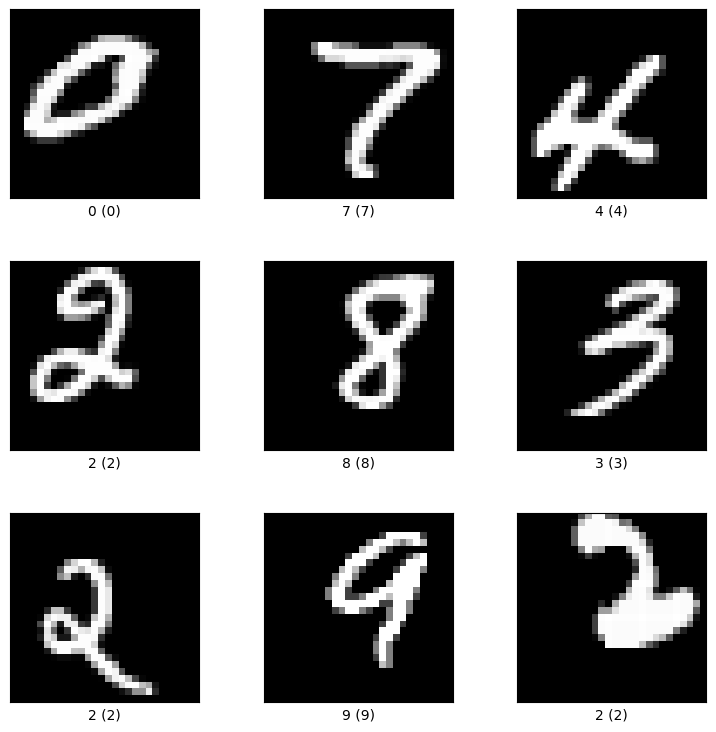

(2000, 28, 28, 1)


In [6]:
corr_images, ds_info = tfds.load(
    "mnist_corrupted/translate",
    split="train[:2000]",
    with_info=True,
)  # type: ignore

corr_images = corr_images.shuffle(corr_images.cardinality())
tfds.visualization.show_examples(corr_images, ds_info)
corr_images = np.array([i["image"] for i in corr_images], dtype=np.float32) / 255.0
# corr_images = corr_images.ravel().reshape((corr_images.shape[0], -1))
print(corr_images.shape)

In [7]:
[(type(detector).__name__, np.mean(detector.predict(images)["is_outlier"])) for detector in detectors]

[('AEOutlier', 0.01),
 ('AEGMMOutlier', 0.01),
 ('VAEOutlier', 0.01),
 ('VAEGMMOutlier', 0.012)]

In [8]:
[(type(detector).__name__, np.mean(detector.predict(corr_images)["is_outlier"])) for detector in detectors]

[('AEOutlier', 0.813),
 ('AEGMMOutlier', 0.008),
 ('VAEOutlier', 0.2955),
 ('VAEGMMOutlier', 0.0175)]

In [9]:
### TEST ASSERTION ###
# print(np.mean(preds_in))
# print(np.mean(preds_corr))
# assert np.mean(preds_in) == approx(0.02, abs=0.02)
# assert np.mean(preds_corr) == approx(0.8, abs=0.1)